# 1. Definicón y código:

Las ecuaciones de lotka-volterra son un modelo simple de dinámicas de especies compitiendo por un recursos en, donde en este caso vemos una relación trófica.

In [ ]:
from scipy.integrate import ode, solve_ivp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Testeos de archivo

df = pd.read_csv("file_t2.csv")
print(df.head())
print(df.shape)



def SimuladorLotkaVolterra(P, z0, file_t, file_out):
    
    #t_eval = np.loadtxt(file_t, skiprows=1)
    #t_eval = np.sort(t_eval)
    df = pd.read_csv(file_t)
    t_eval = df.iloc[:,0]  #AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


    t_eval = np.sort(t_eval) #ordena los tiempos (tuve problemas con esto)

    #Parámetros
    a, b, g, d = P  # alfa, beta, gamma, delta

    #Edos como función anónima
    f = lambda t, z: [
        z[0] * (a - b * z[1]),   # dx/dt
        -z[1] * (g - d * z[0])   # dy/dt
    ]
    tspan = [t_eval.min(), t_eval.max()]
   
   #Solver
    sol = solve_ivp(f, tspan, z0, t_eval=t_eval)

    
    datos = np.column_stack((sol.t, sol.y.T))
    np.savetxt(file_out, datos, header="t x y", comments='')

    # Graficar x(t), y(t)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(sol.t, sol.y[0], label="Presas (x)")
    plt.plot(sol.t, sol.y[1], label="Depredadores (y)")
    plt.xlabel("Tiempo")
    plt.ylabel("Población")
    plt.title("Evolución temporal")
    plt.legend()
    plt.grid(True)

    
    plt.subplot(1, 2, 2)
    plt.plot(sol.y[0], sol.y[1])
    plt.xlabel("Presas (x)")
    plt.ylabel("Depredadores (y)")
    plt.title("Diagrama de fases")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


   1
0  2
1  3
2  4
3  5
4  6
(22, 1)


## 2. Realizamos dos simulaciones donde veremos el efecto de beta y delta


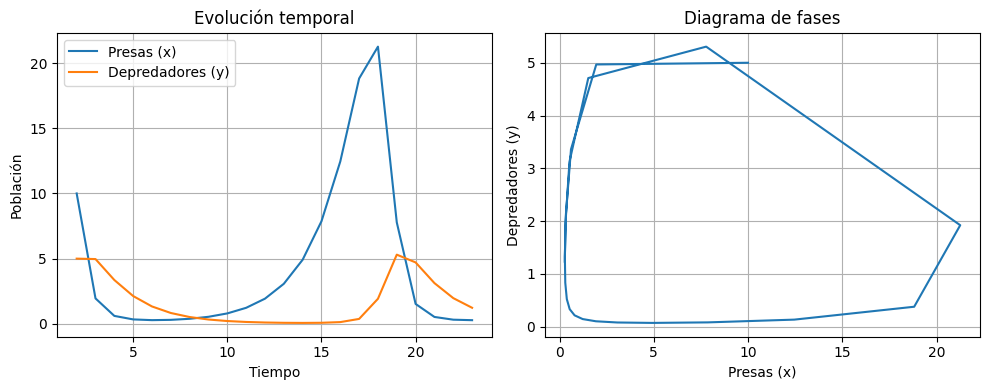

In [2]:
P= [0.5,0.4,0.5,0.1]
z0 = np.array([10,5])
SimuladorLotkaVolterra(P,z0,"file_t2.csv","file_o.txt")


## Ahora d>b donde veremos q en comparación al anterior, el diagrama de fases es abierto, pues desaparece la población de y

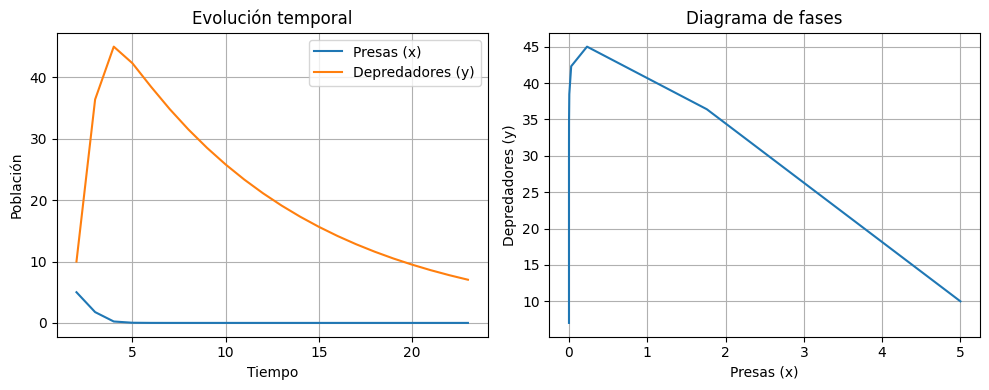

In [3]:
P= [0.1,0.05,0.1,0.4]
z0 = np.array([5,10])
SimuladorLotkaVolterra(P,z0,"file_t2.csv","file_o.txt")

# 3. En los siguientes dos casos se ve como afectan los cambios de alpha y gamma a los gráficos

### Donde mientras mayor son las pendientes más "rígidas" se vuelven las líneas

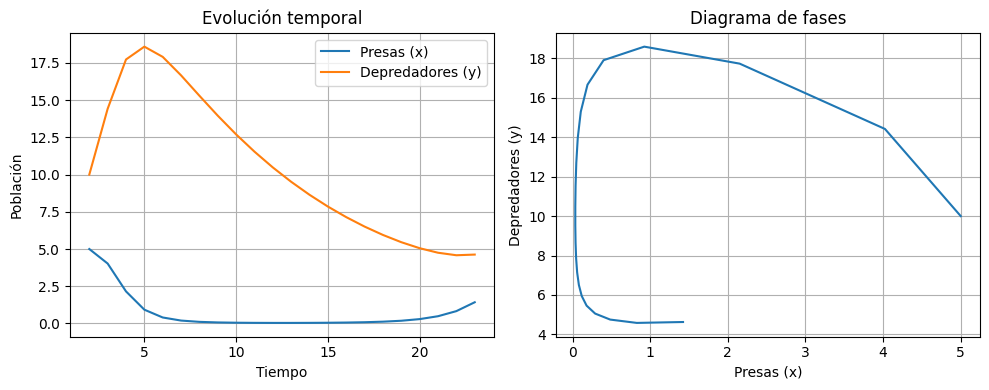

In [4]:
P= [1,0.1,0.1,0.1]
z0 = np.array([5,10])
SimuladorLotkaVolterra(P,z0,"file_t2.csv","file_o.txt")

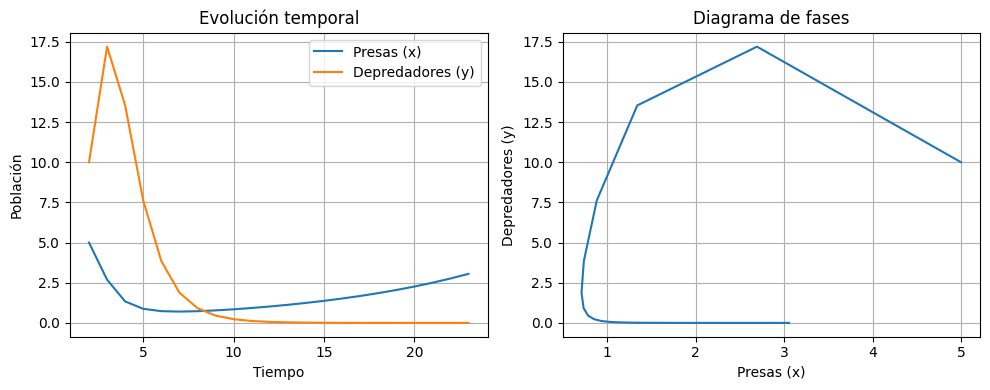

In [5]:
P= [0.1,0.05,1,0.4]
z0 = np.array([5,10])
SimuladorLotkaVolterra(P,z0,"file_t2.csv","file_o.txt")

In [6]:
import scipy
print(scipy.__version__)


1.16.2


# Respuestas preguntas

a. NumPy proporciona estructuras y funciones para el manejo eficiente de arreglos y operaciones numéricas, SciPy amplía esas capacidades con herramientas avanzadas para cálculos (como optimización, integración y estadística), y Matplotlib se utiliza para visualizar datos mediante gráficos y figuras.

b. En Ingeniería de Procesos, estas bibliotecas podrían servir simular y optimizar sistemas químicos, analizar datos experimentales, ajustar modelos cinéticos, resolver ecuaciones diferenciales y visualizar resultados como perfiles de temperatura, concentración o eficiencia de reactores

c. Podría usarse para el curos de métodos matemáticos para procesos o en el caso de numpy para el curso algoritmos y estructuras de datos (aunque recuerdo que este tenía un enfoque usar numpy para datos y no tanto con un enfoque matemático).

e. Mi autoevaluación es un 6.5, donde creo que esta vez fue la que más lidié con problemas tontos del código donde tuve que buscar en documentación, escribir nuevos archivos o buscar más tutoriales para poder entender qué hacer, si me toca presentar me explayo un poco más con las dificultades, pero principalmente fue leer los archivos de tiempo, para las próximas actividades creo que voy a ser un poco más directo con las soluciones, creo que si hubiera hecho un excel con los tiempos del 1 al 20 de un inicio me ahorraba 45 minutos de tarea.